In [15]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re

In [16]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\LoanDataset - LoansDatasest.csv\LoanDataset.csv')
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [18]:
print("Column names:", df.columns.tolist())
print("Dataset shape:", df.shape)

Column names: ['customer_id', 'customer_age', 'customer_income', 'home_ownership', 'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length', 'Current_loan_status']
Dataset shape: (32586, 13)


In [19]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64


In [20]:
# Copy for Cleaning
df_clean = df.copy()

In [21]:
# Drop ID column (not useful for prediction)
df_clean.drop(columns=['customer_id'], inplace=True)

In [22]:
# Clean numeric columns that might have non-numeric characters
for col in ['customer_income', 'loan_amnt', 'loan_int_rate']:
    df_clean[col] = df_clean[col].astype(str)
    df_clean[col] = df_clean[col].apply(lambda x: re.sub(r'[^\d\.]', '', x))
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

In [23]:
# Drop rows with any missing values
df_clean.dropna(inplace=True)

In [25]:
# Label Encode all object (categorical) columns
le = LabelEncoder()
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = le.fit_transform(df_clean[col])

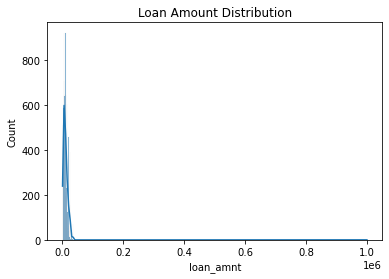

In [26]:
# EDA (Visualizations)
plt.figure(figsize=(6,4))
sns.histplot(df_clean['loan_amnt'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

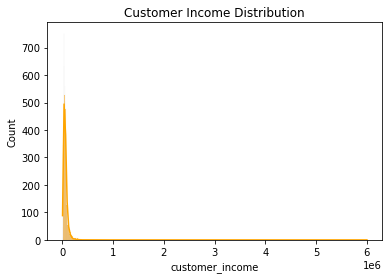

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean['customer_income'], kde=True, color='orange')
plt.title('Customer Income Distribution')
plt.show()

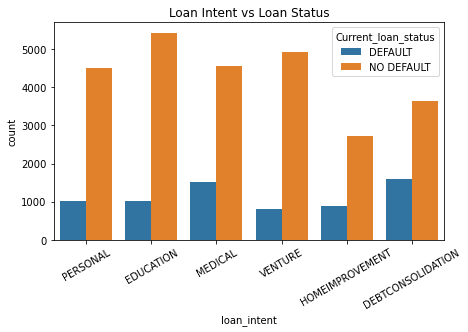

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(x='loan_intent', hue='Current_loan_status', data=df)
plt.title('Loan Intent vs Loan Status')
plt.xticks(rotation=30)
plt.show()

In [30]:
# Define Features and Target
X = df_clean.drop('Current_loan_status', axis=1)
y = df_clean['Current_loan_status']

In [31]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Evaluate
y_pred = model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.6834532374100719

 Confusion Matrix:
 [[978 217]
 [443 447]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75      1195
           1       0.67      0.50      0.58       890

    accuracy                           0.68      2085
   macro avg       0.68      0.66      0.66      2085
weighted avg       0.68      0.68      0.67      2085

